In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To supress warnings
import warnings
warnings.filterwarnings('ignore')



## 1. Application data analysis

In [325]:
#importing datasets
Application_data=pd.read_csv("/Users/anilkumar/Downloads/application_data.csv")


In [326]:
#determining the shape of application data(rows & columns)
Application_data.shape


(307511, 122)

In [182]:
Application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 94 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    252137 non-null  int64   
 1   TARGET                        252137 non-null  int64   
 2   NAME_CONTRACT_TYPE            252137 non-null  object  
 3   CODE_GENDER                   252137 non-null  object  
 4   FLAG_OWN_CAR                  252137 non-null  object  
 5   FLAG_OWN_REALTY               252137 non-null  object  
 6   CNT_CHILDREN                  252137 non-null  int64   
 7   AMT_INCOME_TOTAL              252137 non-null  float64 
 8   AMT_CREDIT                    252137 non-null  float64 
 9   AMT_ANNUITY                   252137 non-null  float64 
 10  AMT_GOODS_PRICE               251881 non-null  float64 
 11  NAME_TYPE_SUITE               251041 non-null  object  
 12  NAME_INCOME_TYPE              

In [7]:
Application_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Treating the missing values - Application_data

In [183]:
Application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_MON     33856
AMT_REQ_CREDIT_BUREAU_QRT     33856
AMT_REQ_CREDIT_BUREAU_YEAR    33856
INCOME_RANGE                      0
CREDIT_RANGE                      0
Length: 94, dtype: int64

In [232]:
#number of columns having more than 40% of missing values
nullColumns=Application_data.isnull().sum()
nullColumns=nullColumns[nullColumns.values>(0.4*len(nullColumns))]
len(nullColumns)

64

In [233]:
#columns in application data having less than 40% null values
Application_data.isnull().sum()/len(Application_data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_MON     13.427621
AMT_REQ_CREDIT_BUREAU_QRT     13.427621
AMT_REQ_CREDIT_BUREAU_YEAR    13.427621
INCOME_RANGE                   0.000000
CREDIT_RANGE                   0.000000
Length: 94, dtype: float64

In [12]:
Application_data['AMT_ANNUITY'].isnull().sum()

12

In [13]:
Application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

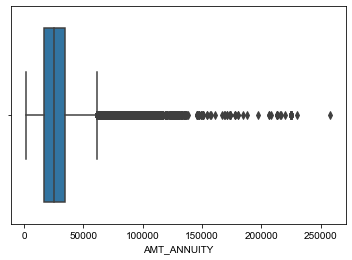

In [14]:
#box plot to check on outliers.  This would help to take a call on addressing missing values
sns.boxplot(Application_data.AMT_ANNUITY)
sns.set_style('darkgrid')
plt.show()

Inference:
1. AMT_ANNUITY has a few missing values, which can be imputed.  The missing cells could be filled with the median value as there are large number of outlier.

In [15]:
#Missing value under AMT_ANNUITY is filled with median value
Median_value=Application_data['AMT_ANNUITY'].median()
Application_data.loc[Application_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']= Median_value

In [16]:
Application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [17]:
# deleting rows having null values greater than or equal to 40%

nullRows=Application_data.isnull().sum(axis=1)
nullRows=list(nullRows[nullRows.values>=0.4*len(Application_data)].index)
Application_data.drop(labels=nullRows,axis=0,inplace=True)
print(len(nullRows))

0


In [18]:
Application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#remove columns in the dataset which are not required

notrequired=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
Application_data.drop(labels=notrequired, axis=1, inplace=True)

In [20]:
Application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 92, dtype: int64

In [21]:
Application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are some columns with 'XNA'. The rows and columns with XNA has to be find replace with appropriate values.

In [22]:
#Finding categorical column having 'XNA'
#Gender column
Application_data[Application_data['CODE_GENDER']=='XNA'].shape

(4, 92)

In [23]:
#Finding categorical column having 'XNA'
#Organization type
Application_data[Application_data['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 92)

There are 4 rows in CODE_GENDER and 55374 rows in ORGANIZATION_TYPE having XNA

In [24]:
Application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Female has highest value counts and there are 4 rows with XNA.  We could update to Gender 'F' with 4 NA's.

In [25]:
#Gender 'F' is updated
Application_data.loc[Application_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
Application_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [26]:
Application_data['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

The ORGANIZATION_TYPE has 307511 counts out of which 55374 rows has XNA.

In [27]:
#percentage of XNA in ORGANIZATION_TYPE
print(55374/307511*100, 'of ORGANIZATION_TYPE column has XNA')

18.00716071945394 of ORGANIZATION_TYPE column has XNA


Since 18% of the column has XNA, dropping this would not have major impact on the dataset

In [28]:
#drop the rows of total 55374 which has 'XNA' in the ORGANIZATION_TYPE column

Application_data=Application_data.drop(Application_data.loc[Application_data['ORGANIZATION_TYPE']=='XNA'].index)


In [29]:
Application_data[Application_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 92)

In [30]:
#checking the shape of dataset
Application_data.shape

(252137, 92)

In [31]:
# checking the attributes of Application_data
Application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 92 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    252137 non-null  int64  
 1   TARGET                        252137 non-null  int64  
 2   NAME_CONTRACT_TYPE            252137 non-null  object 
 3   CODE_GENDER                   252137 non-null  object 
 4   FLAG_OWN_CAR                  252137 non-null  object 
 5   FLAG_OWN_REALTY               252137 non-null  object 
 6   CNT_CHILDREN                  252137 non-null  int64  
 7   AMT_INCOME_TOTAL              252137 non-null  float64
 8   AMT_CREDIT                    252137 non-null  float64
 9   AMT_ANNUITY                   252137 non-null  float64
 10  AMT_GOODS_PRICE               251881 non-null  float64
 11  NAME_TYPE_SUITE               251041 non-null  object 
 12  NAME_INCOME_TYPE              252137 non-nul

In [32]:
Application_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# variables into numeric 

numericColumns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

Application_data[numericColumns]=Application_data[numericColumns].apply(pd.to_numeric)
Application_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Find the data imbalance between target groups

In [34]:
# Create two categories of datasets: 
#target=1:client with payment difficulties)
#target=0:all other

target0_Application_data=Application_data.loc[Application_data["TARGET"]==0]
target1_Application_data=Application_data.loc[Application_data["TARGET"]==1]

In [35]:
#Finding the difference between target0 and target1
len(target0_Application_data)-len(target1_Application_data)

208467

target0 is more than target1

In [36]:
#as target0 is more than target1, need to find the ratio of imbalance
round(len(target0_Application_data)/len(target1_Application_data),2)

10.55

Percentage of ratio of imbalance is 10.55

9% of the applicant have problem in repaying the credit

## Analysis of data imbalance 

In [43]:
#Create bins having continuous values for income amount and credit amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

Application_data['INCOME_RANGE']=pd.cut(Application_data['AMT_INCOME_TOTAL'],bins=bins,labels=slot)

In [44]:
# Create bins having continuous values for for credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slot = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

Application_data['CREDIT_RANGE']=pd.cut(Application_data['AMT_CREDIT'],bins=bins,labels=slot)

In [56]:
Application_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000,500000-550000


### Univariate analysis of numerical variables and categorical variables
### - Target0

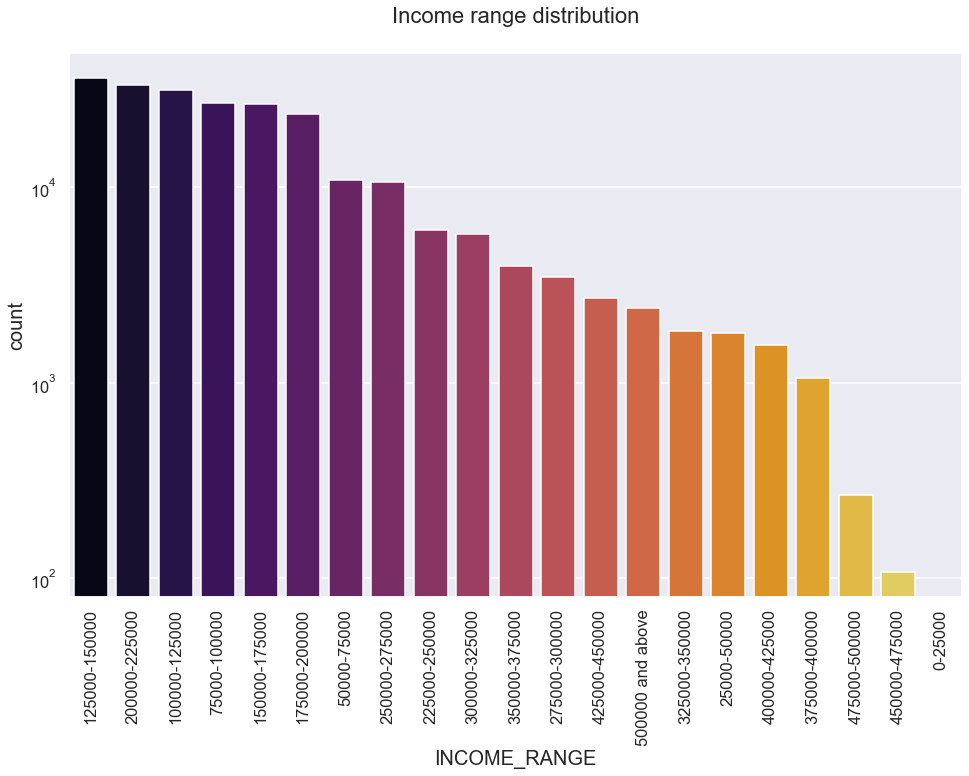

In [184]:
# plot income range distribution
plt.figure(figsize=(16,10))
sns.countplot(x=target0_Application_data['INCOME_RANGE'],
              palette="inferno",
              order=target0_Application_data["INCOME_RANGE"].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Income range distribution')
plt.show()


Inference:
1. More number of people are earning the income in the range between 125000-150000
2. Very less number of people are earning the income in the range between 450000-475000


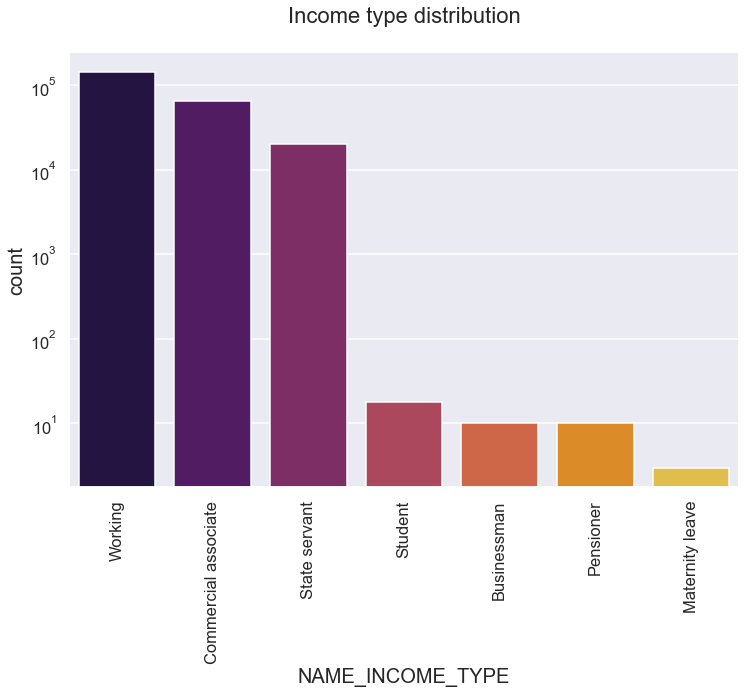

In [159]:
# plot income type distribution
plt.figure(figsize=(12,8))
sns.countplot(x=target0_Application_data['NAME_INCOME_TYPE'],
              palette="inferno",
              order=target0_Application_data['NAME_INCOME_TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Income type distribution')
plt.show()

Inference:
1. Working class has highest counts, followed by commercial associate and state servant
2. Student, businessmen, pensioner and maternity leave has less counts

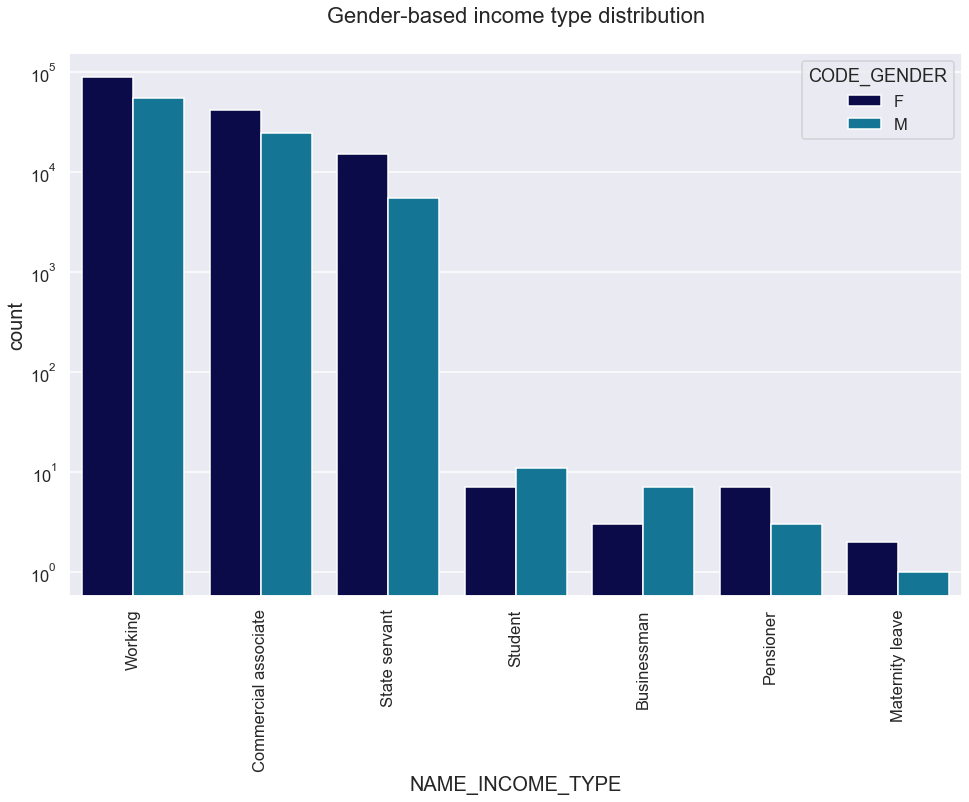

In [156]:
#plot gender based income distribution
plt.figure(figsize=(16,10))
sns.countplot(x=target0_Application_data['NAME_INCOME_TYPE'],
              hue=target0_Application_data['CODE_GENDER'],
              palette='ocean',
              order=target0_Application_data['NAME_INCOME_TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Gender-based income type distribution')
plt.show()

Inference:
1. Female category has the highest counts amongst top three classes i.e, working, commercial assocites and state servant
2. Male category has is highest amongst students and businessmen
3. Females are applying more for credit

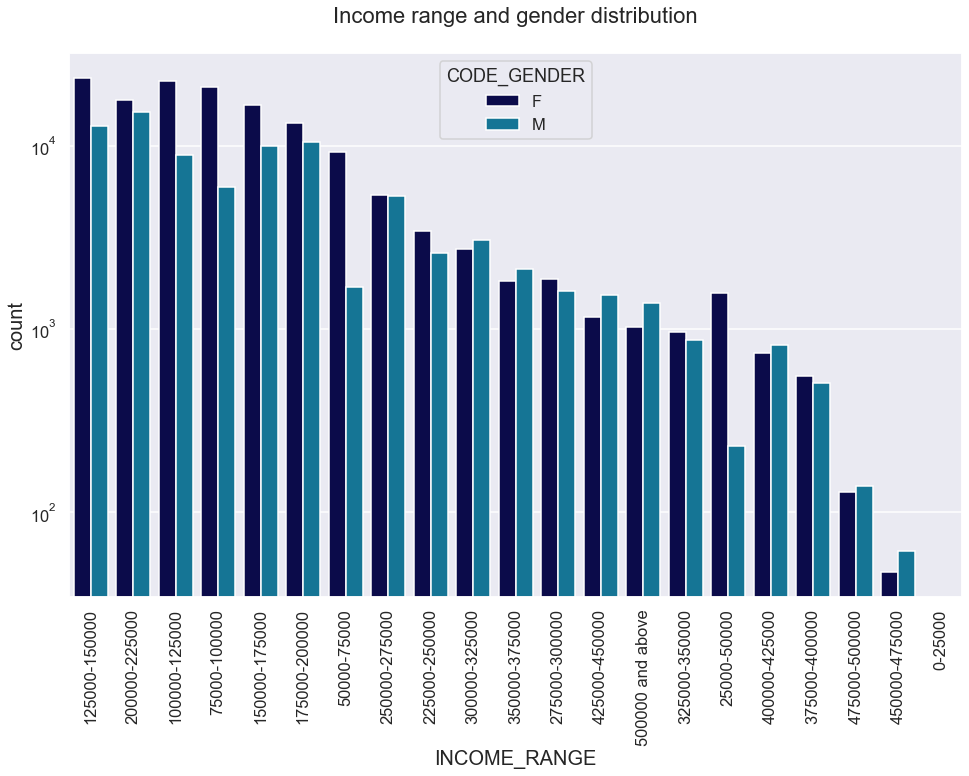

In [153]:
#plot income range and gender distribution
plt.figure(figsize=(16,10))
sns.countplot(x=target0_Application_data['INCOME_RANGE'],
              hue=target0_Application_data['CODE_GENDER'],
              palette='ocean',
              order=target0_Application_data['INCOME_RANGE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Income range and gender distribution')
plt.show()

Inference:
1. Amongst non-defaulter more number of females are in high income range than males

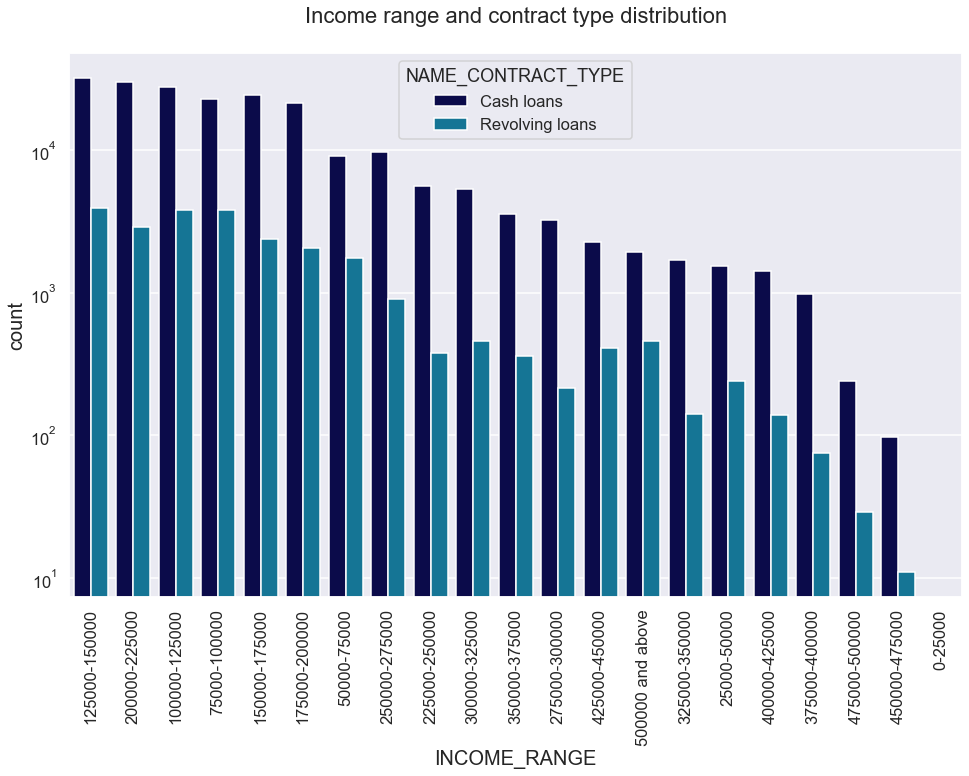

In [327]:
#plot income range and contract type
plt.figure(figsize=(16,10))
sns.countplot(x=target0_Application_data['INCOME_RANGE'],
              hue=target0_Application_data['NAME_CONTRACT_TYPE'],
              palette='ocean',
              order=target0_Application_data['INCOME_RANGE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Income range and contract type distribution')
plt.show()

Inference:
1. Amongst the non-defaulters cash loans have the highest count
2. People having the income range of 125000-150000 are going for cash loans than revolving loans

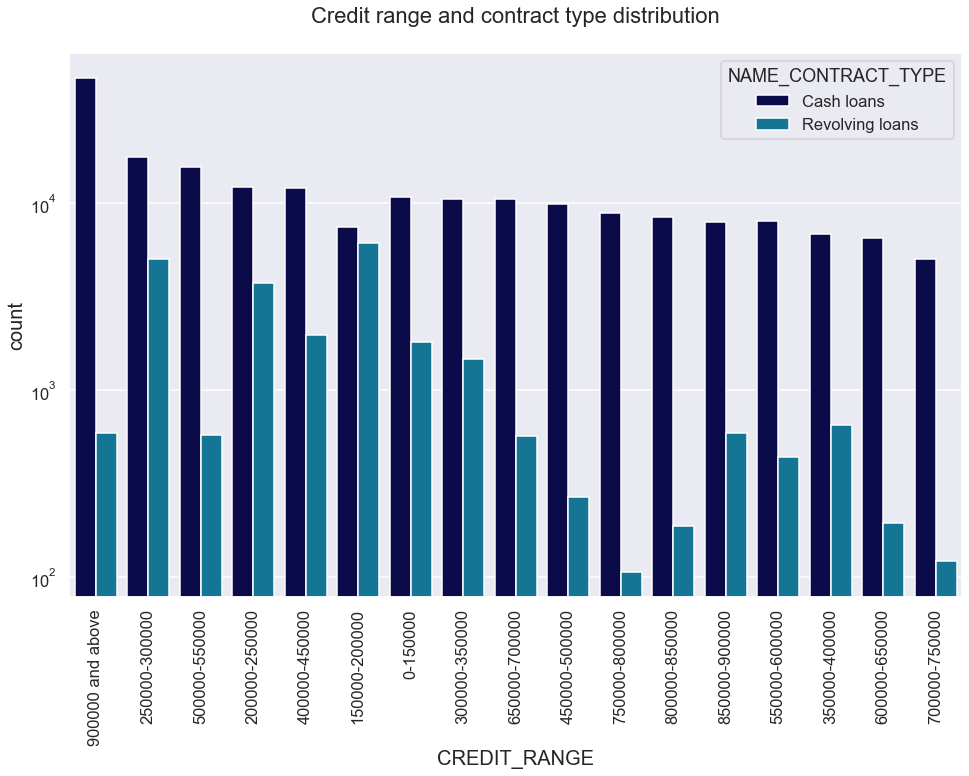

In [161]:
#plot credit range and contract type
plt.figure(figsize=(16,10))
sns.countplot(x=target0_Application_data['CREDIT_RANGE'],
              hue=target0_Application_data['NAME_CONTRACT_TYPE'],
              palette='ocean',
              order=target0_Application_data['CREDIT_RANGE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Credit range and contract type distribution')
plt.show()

Inference:
1. Amongst the non-defaulters cash loans have the highest count
2. People having the credit range more than 900000 and above are going for cash loans than revolving loans
3. The credit range of 150000-200000 has a mix of cash and revolving loans

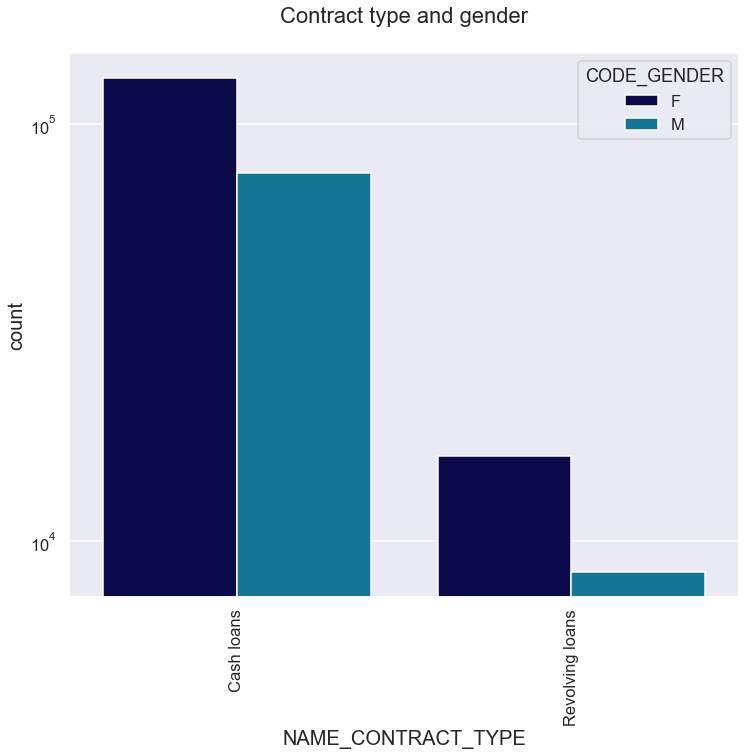

In [172]:
#plot contract type and gender
plt.figure(figsize=(12,10))
sns.countplot(x=target0_Application_data['NAME_CONTRACT_TYPE'],
              hue=target0_Application_data['CODE_GENDER'],
              palette='ocean',
              order=target0_Application_data['NAME_CONTRACT_TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Contract type and gender')
plt.show()

Inference:
1. Cash loans applicants amongst non-defaulters is the highest
2. More number of female applicants have applied for cash loans

# Univariate analysis of numerical variables and categorical variables
# - Target1

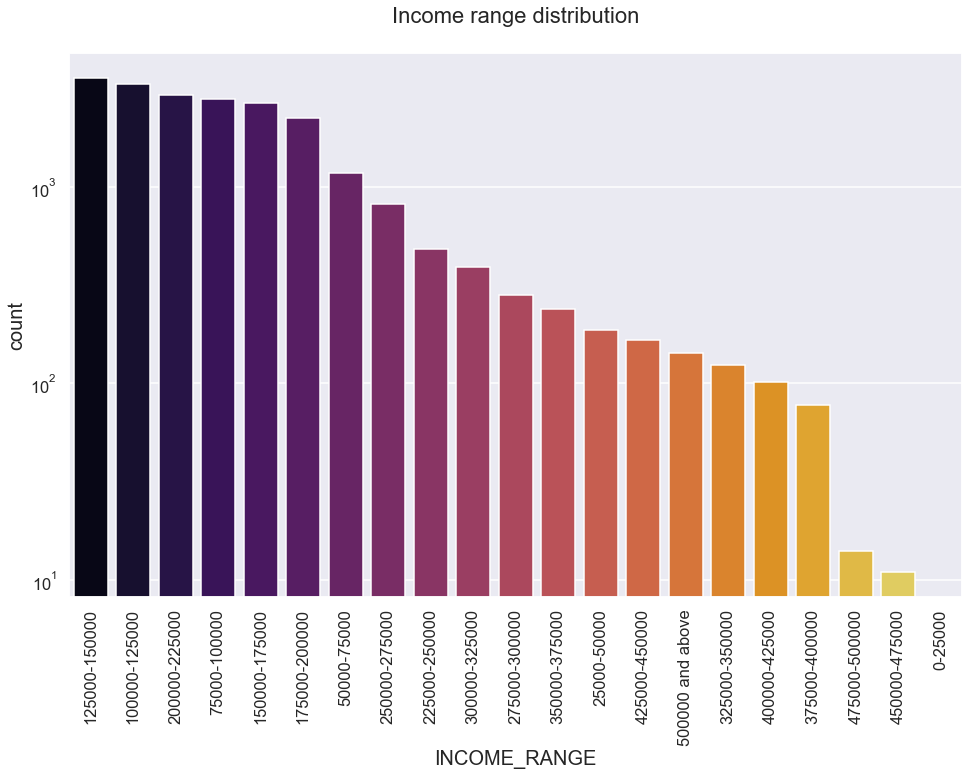

In [173]:
#plot income range distribution
plt.figure(figsize=(16,10))
sns.countplot(x=target1_Application_data['INCOME_RANGE'],
              palette="inferno",
              order=target1_Application_data["INCOME_RANGE"].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Income range distribution')
plt.show()

Inference:
1. Highest defaulters falls in the income range of 125000-150000
2. People with income range of 375000-500000 has less defaulters count

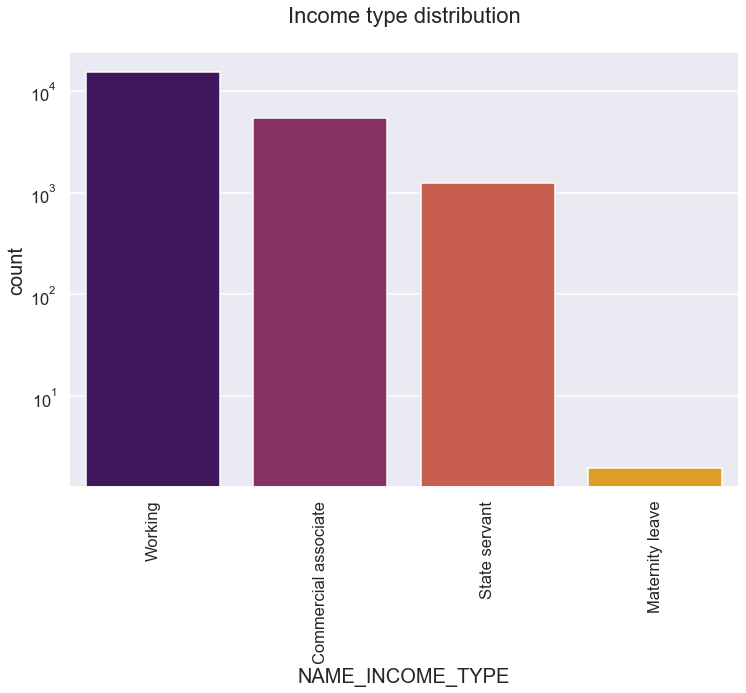

In [174]:
#plot income type distribution
plt.figure(figsize=(12,8))
sns.countplot(x=target1_Application_data['NAME_INCOME_TYPE'],
              palette="inferno",
              order=target1_Application_data['NAME_INCOME_TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Income type distribution')
plt.show()

Inference:
1. Working class group are the highest

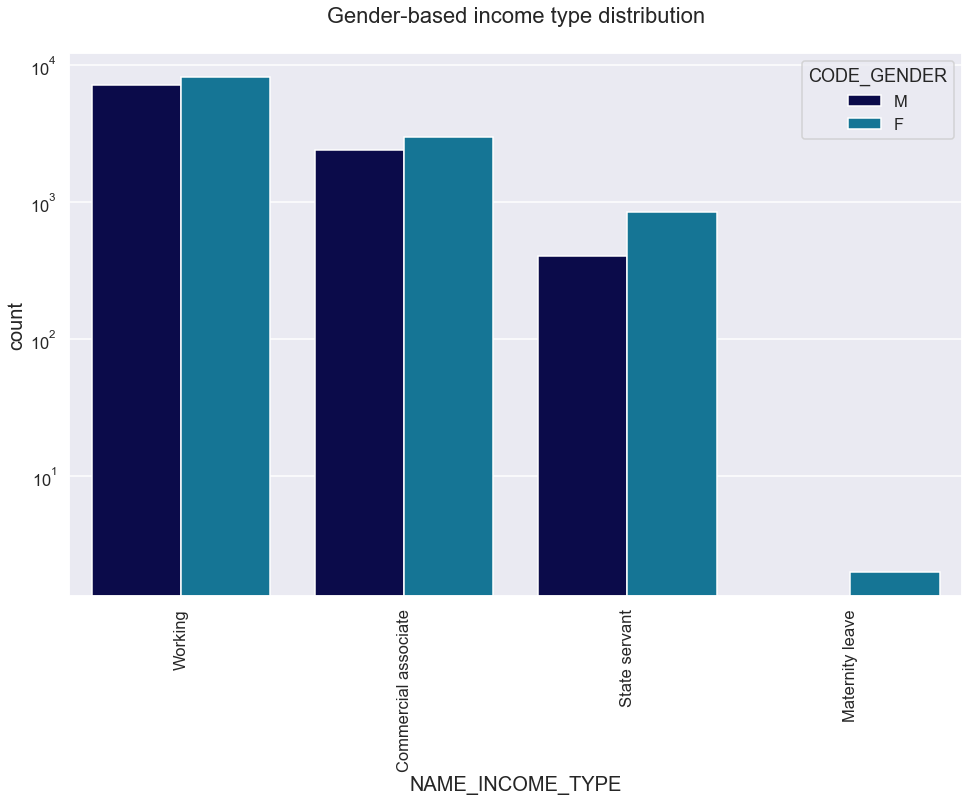

In [175]:
# Gender-based income type distribution
plt.figure(figsize=(16,10))
sns.countplot(x=target1_Application_data['NAME_INCOME_TYPE'],
              hue=target1_Application_data['CODE_GENDER'],
              palette='ocean',
              order=target1_Application_data['NAME_INCOME_TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Gender-based income type distribution')
plt.show()

Inference:
1. Amongst defaulters, the working class has almost similar gender distribution
2. Amongst commercial associates and state servants the female counts are more than male counts

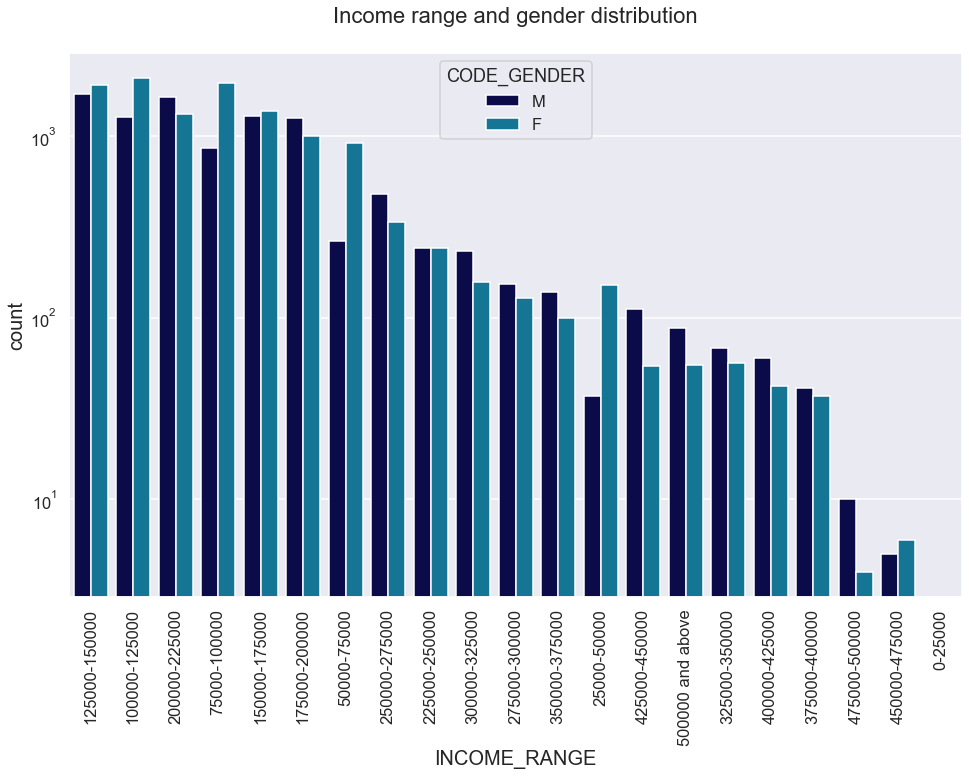

In [176]:
#Income range and gender distribution
plt.figure(figsize=(16,10))
sns.countplot(x=target1_Application_data['INCOME_RANGE'],
              hue=target1_Application_data['CODE_GENDER'],
              palette='ocean',
              order=target1_Application_data['INCOME_RANGE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Income range and gender distribution')
plt.show()

Inference:
1. Males are more than female in having credits in the range of one lakh to two lakh


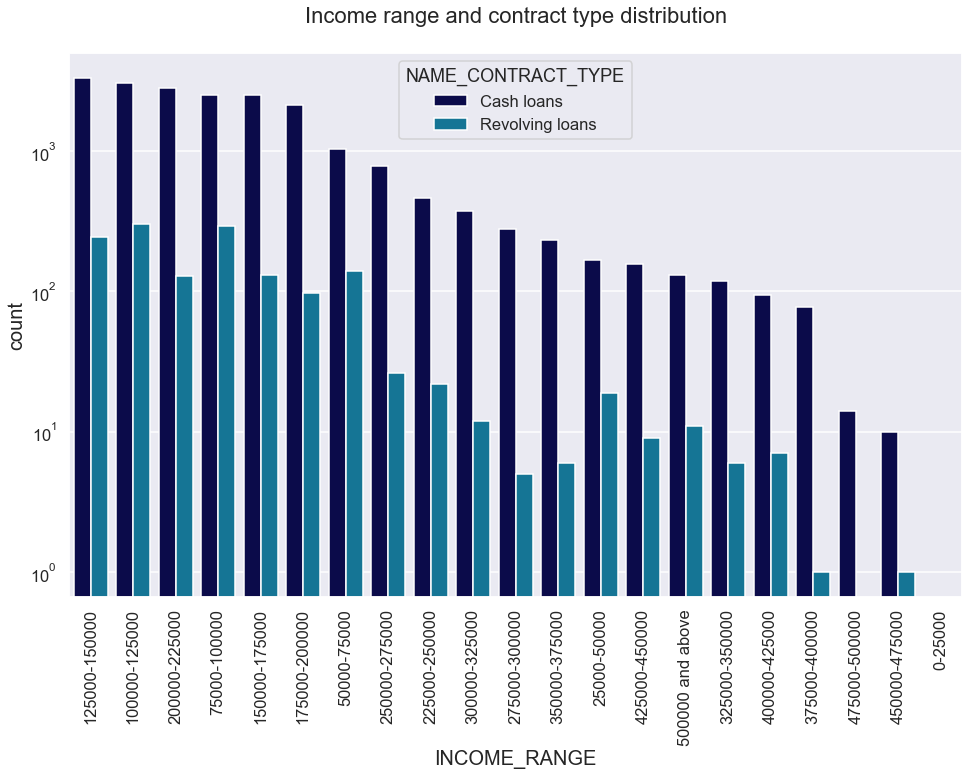

In [178]:
# income range and contract type distribution
plt.figure(figsize=(16,10))
sns.countplot(x=target1_Application_data['INCOME_RANGE'],
              hue=target1_Application_data['NAME_CONTRACT_TYPE'],
              palette='ocean',
              order=target1_Application_data['INCOME_RANGE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Income range and contract type distribution')
plt.show()

Inference:
1. Defaulter are going more for cash loans
2. More defaulters can be seen across all the income ranges

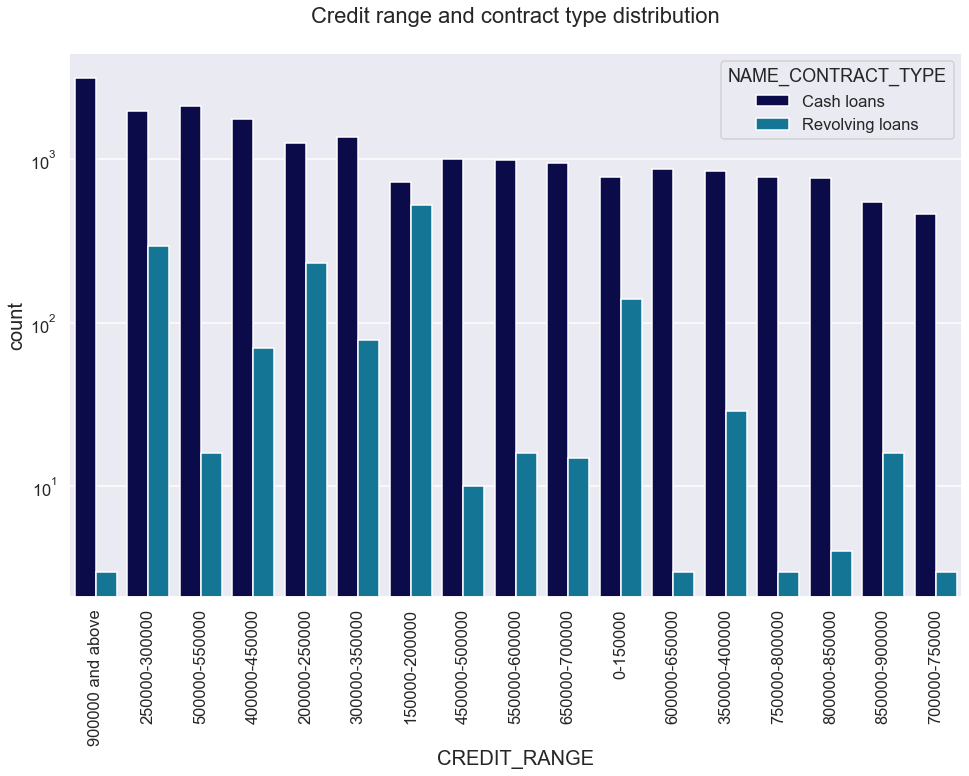

In [179]:
#plot credit range and contract type distribution
plt.figure(figsize=(16,10))
sns.countplot(x=target1_Application_data['CREDIT_RANGE'],
              hue=target1_Application_data['NAME_CONTRACT_TYPE'],
              palette='ocean',
              order=target1_Application_data['CREDIT_RANGE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Credit range and contract type distribution')
plt.show()

Inference:

1. Cash loans are the popular one than revolving loans amongst defaulters
2. Cash loans and revolving loans are almost similar in the credit range 150000-200000

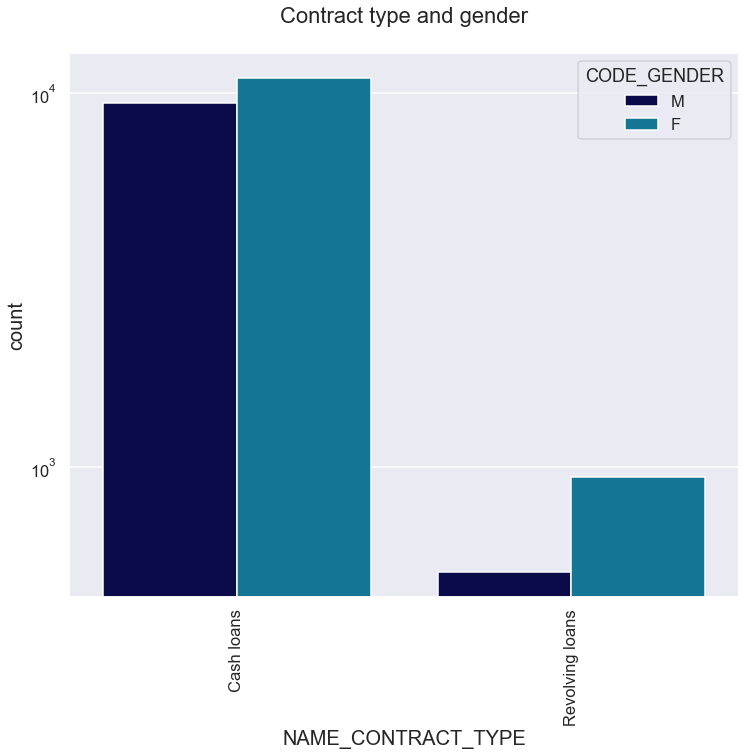

In [180]:
plt.figure(figsize=(12,10))
sns.countplot(x=target1_Application_data['NAME_CONTRACT_TYPE'],
              hue=target1_Application_data['CODE_GENDER'],
              palette='ocean',
              order=target1_Application_data['NAME_CONTRACT_TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Contract type and gender')
plt.show()

Inference:
1. The share of cash loans between male and female is almost similar, amongst defaulters
2. Females defaulters are going more for revolving loans than male defaulters

## Bivariate analysis - Target 0 - Using box plot

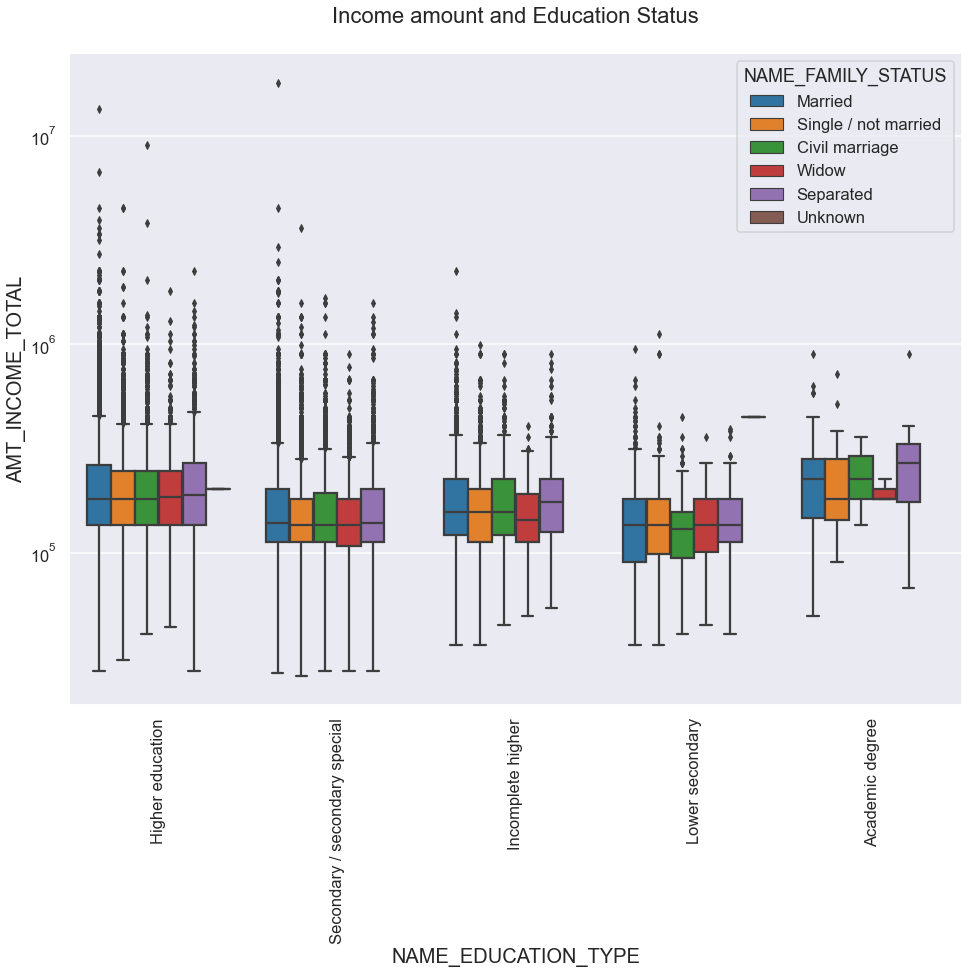

In [340]:
#box plot income with education status amongst target 0
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =target0_Application_data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount and Education Status')
plt.show()

Inference:
1. Family income status is almost similar for higher education status
2. Lower secondary has less income
3. Academic degree has less outlier

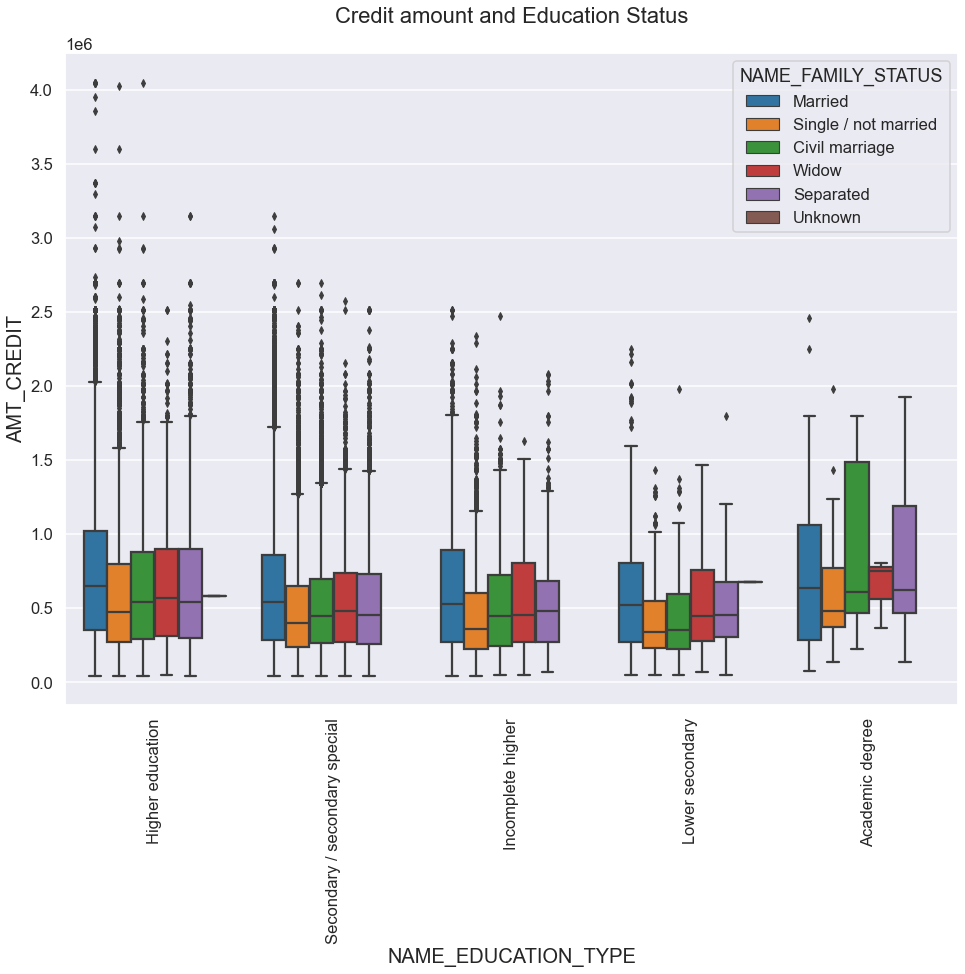

In [344]:
#box plotting for credit amount and education type

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.boxplot(data =target0_Application_data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount and Education Status')
plt.show()

Inference:
1. Academic degree has less outlier, whereas higher education and secondary has more outliers
2. Married, separated, civil marriage having academic degrees have amount of credits

## Bivariate analysis - Target 1 - using box plot

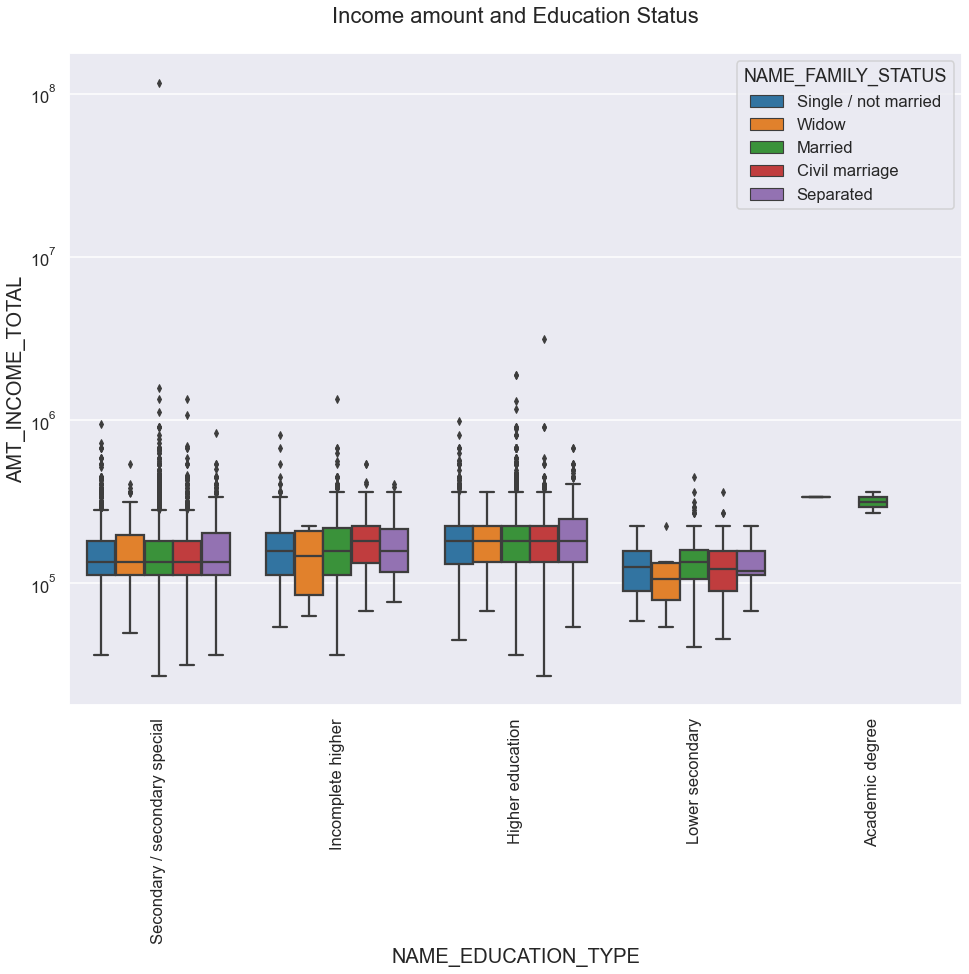

In [330]:
#box plot income with education status amongst target 1
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =target1_Application_data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount and Education Status')
plt.show()

Inference:
1. Secondary and higher education has large outliers
2. Widows who are defaulters with lower secondary education are getting less income
3. All the family status (defaulters) with higher education are getting almost similar income

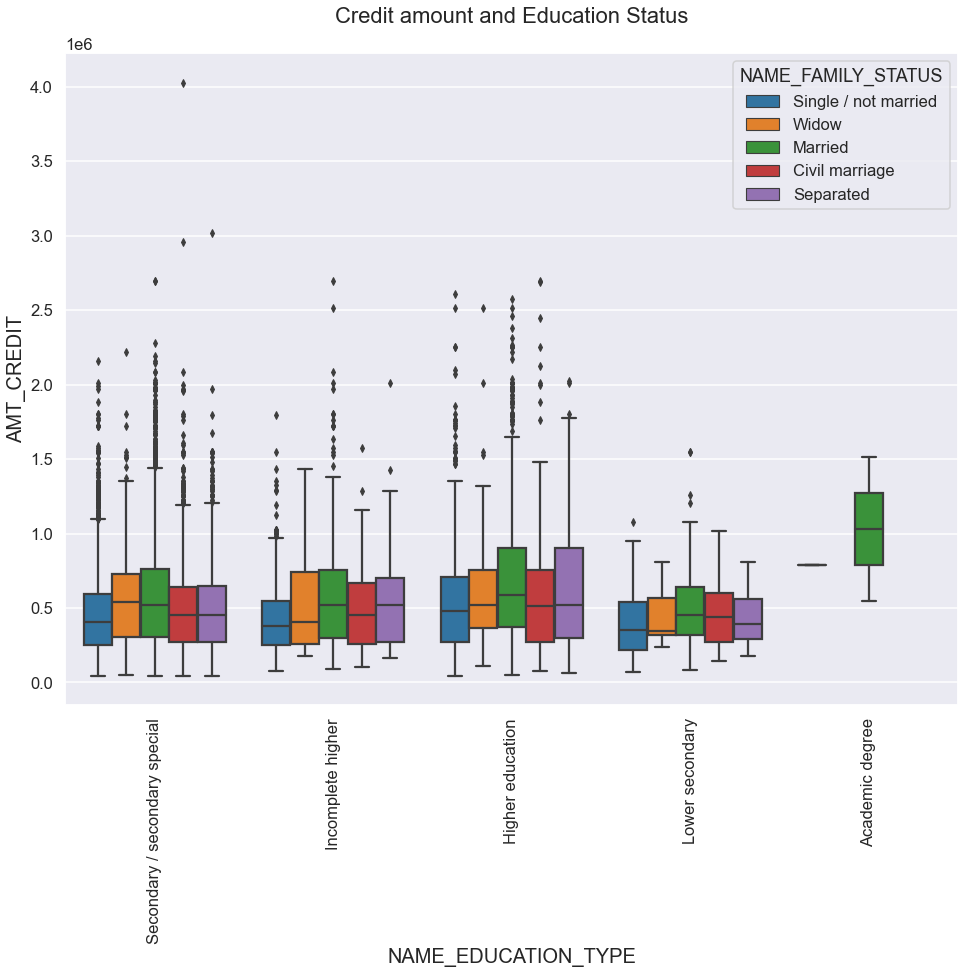

In [345]:
#box plotting for credit amount and education type

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.boxplot(data =target1_Application_data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount and Education Status')
plt.show()

Inference:
1. Secondary, incomplete higher and higher education has large outliers
2. People with different family status with lower secondary and defaulters are getting less credits
3. Married people who are defaulters are getting more credits.

## Application_Target0 - Outliers

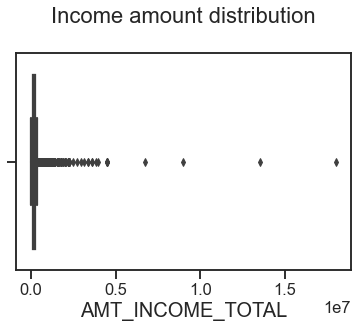

In [204]:
sns.boxplot(target0_Application_data.AMT_INCOME_TOTAL)
sns.set_style('ticks')
plt.title('Income amount distribution')
plt.show()

Inference:
1. There are many outliers in the income distributin

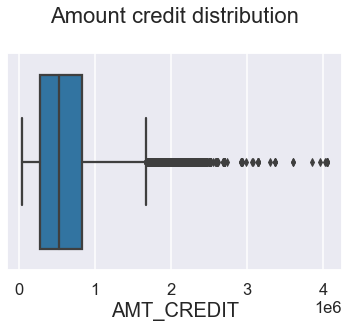

In [346]:
sns.boxplot(target0_Application_data.AMT_CREDIT)
sns.set_style('ticks')
plt.title('Amount credit distribution')
plt.show()

Inference:
1. There are many outliers in the credit distribution

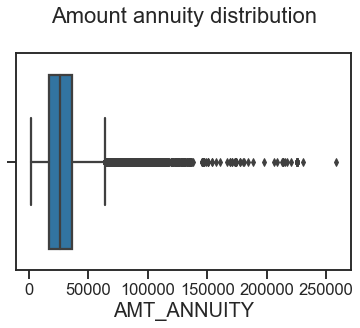

In [347]:
sns.boxplot(target0_Application_data.AMT_ANNUITY)
sns.set_style('ticks')
plt.title('Amount annuity distribution')
plt.show()

Inference:
1. There are many outliers in the Annuity distribution

## Application_Target1 - Outliers

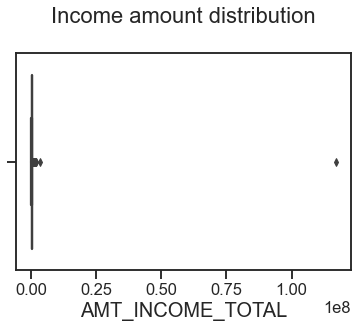

In [210]:
sns.boxplot(target1_Application_data.AMT_INCOME_TOTAL)
sns.set_style('ticks')
plt.title('Income amount distribution')
plt.show()

Inference:
1. There are less outliers in the income distribution

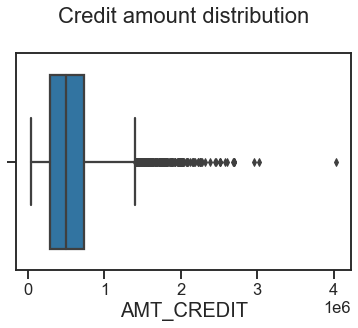

In [348]:
sns.boxplot(target1_Application_data.AMT_CREDIT)
sns.set_style('ticks')
plt.title('Credit amount distribution')
plt.show()

Inference:
1. There are many outliers in the credit distribution

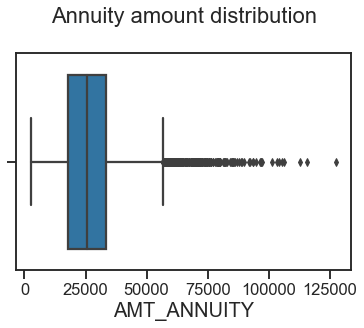

In [349]:
sns.boxplot(target1_Application_data.AMT_ANNUITY)
sns.set_style('ticks')
plt.title('Annuity amount distribution')
plt.show()

Inference:
1. There are many outliers in the amount annuity distributin

## Top correlations in application data

In [317]:
non_defaulter = Application_data[Application_data['TARGET'] == 0]
defaulter = Application_data[Application_data['TARGET'] == 1]

In [318]:
#Top 10 correlation amongst non-defaulters
corrmat = non_defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)


,Var1,Var2,Correlation
5234,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
4207,COMMONAREA_MEDI,COMMONAREA_AVG,1.00
4746,LIVINGAREA_MEDI,LIVINGAREA_AVG,1.00
3899,APARTMENTS_MEDI,APARTMENTS_AVG,1.00
4284,ELEVATORS_MEDI,ELEVATORS_AVG,1.00
4361,ENTRANCES_MEDI,ENTRANCES_AVG,1.00
4515,FLOORSMIN_MEDI,FLOORSMIN_AVG,1.00
4130,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,1.00
4438,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
4452,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99


In [320]:
#Top 10 correlation amongst non-defaulters
corrmat = defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
4837,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,1.0
5234,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.0
4669,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,1.0
4207,COMMONAREA_MEDI,COMMONAREA_AVG,1.0
3976,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,1.0
4438,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.0
4053,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,1.0
4130,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,1.0
4515,FLOORSMIN_MEDI,FLOORSMIN_AVG,1.0
4823,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,1.0


## Previous application data analysis

In [235]:
PreviousApplication_data=pd.read_csv("/Users/anilkumar/Desktop/previous_application.csv")

In [261]:
PreviousApplication_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

In [263]:
#determining the shape of previous application data(rows & columns)
PreviousApplication_data.shape

(1670214, 22)

In [264]:
PreviousApplication_data.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

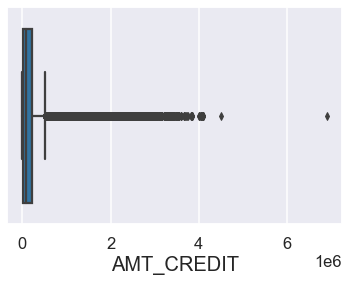

In [269]:
#box plot to check on outliers.  This would help to take a call on addressing missing values
sns.boxplot(PreviousApplication_data.AMT_CREDIT)
sns.set_style('darkgrid')
plt.show()

Inference:
1. AMT_CREDIT has a few missing values, which can be imputed.The missing cells could be filled with the median value as there are large number of outlier.

In [270]:
#Missing value under AMT_ANNUITY is filled with median value
Median_value=PreviousApplication_data['AMT_CREDIT'].median()
PreviousApplication_data.loc[PreviousApplication_data['AMT_CREDIT'].isnull(),'AMT_CREDIT']= Median_value

In [271]:
PreviousApplication_data.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

In [272]:
PreviousApplication_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,...,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,...,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,...,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,...,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


In [275]:
#remove XNA and XAP
PreviousApplication_data=PreviousApplication_data.drop(PreviousApplication_data[PreviousApplication_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
PreviousApplication_data=PreviousApplication_data.drop(PreviousApplication_data[PreviousApplication_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
PreviousApplication_data=PreviousApplication_data.drop(PreviousApplication_data[PreviousApplication_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

PreviousApplication_data.shape

(63712, 22)

In [276]:
#merge application data with previous application data

NewData=pd.merge(left=Application_data,right=PreviousApplication_data,how='inner',on='SK_ID_CURR',suffixes='_x')

In [277]:
NewData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


In [278]:
# renaming the column names post-merge

NewData1 = NewData.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [279]:
# delete unwanted columns 

NewData1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [280]:
NewData1.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


## Bivariate analysis

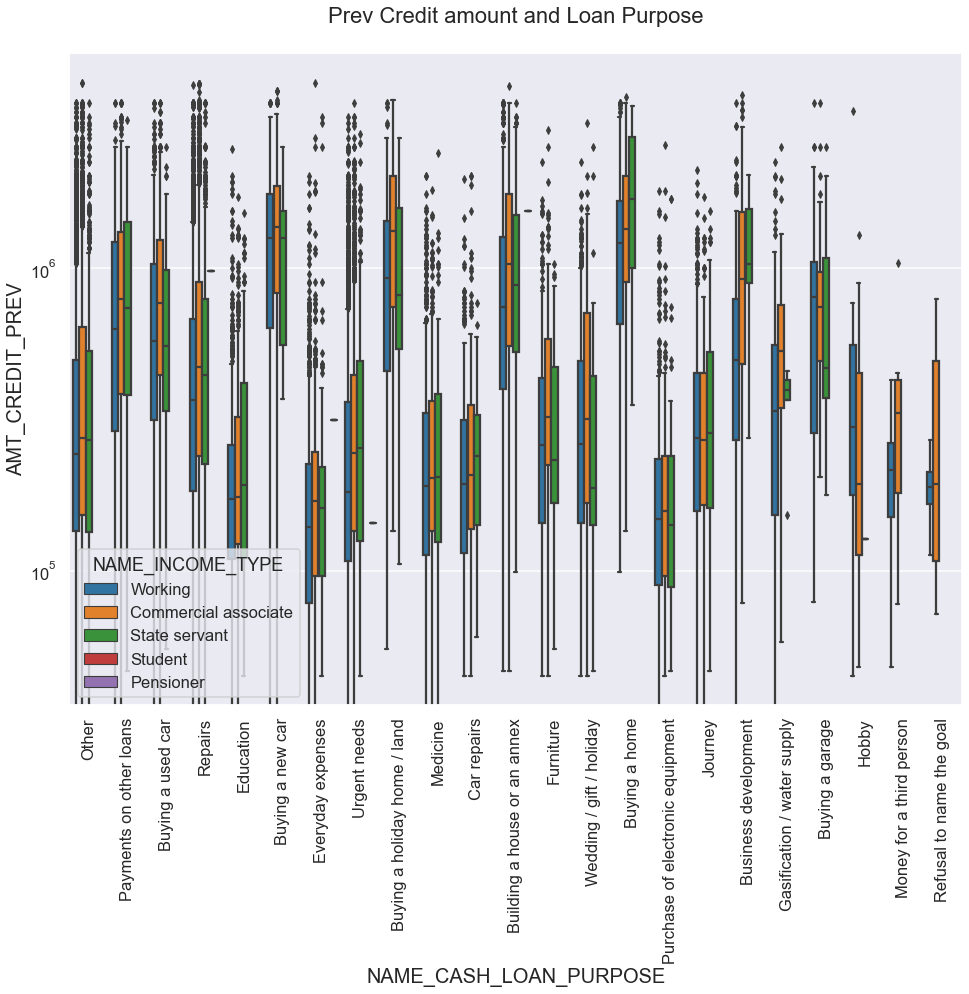

In [341]:
# box plotting for credit amount 

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =NewData1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount and Loan Purpose')
plt.show()

Inference:
1. People are taking less credit for purchasing electronic equipments and everyday expenses
2. More credit demand is their for buying homes especially by state servants.
3. More credit demand is their for building house by commercial associates.
4. Commercial associates are taking more credit for purchasing the new cars
5. More credit demand is their for buying new cars, buying holiday home or land, building house, buying home and business development.
6. Very less demand for hobby and money for a third person.

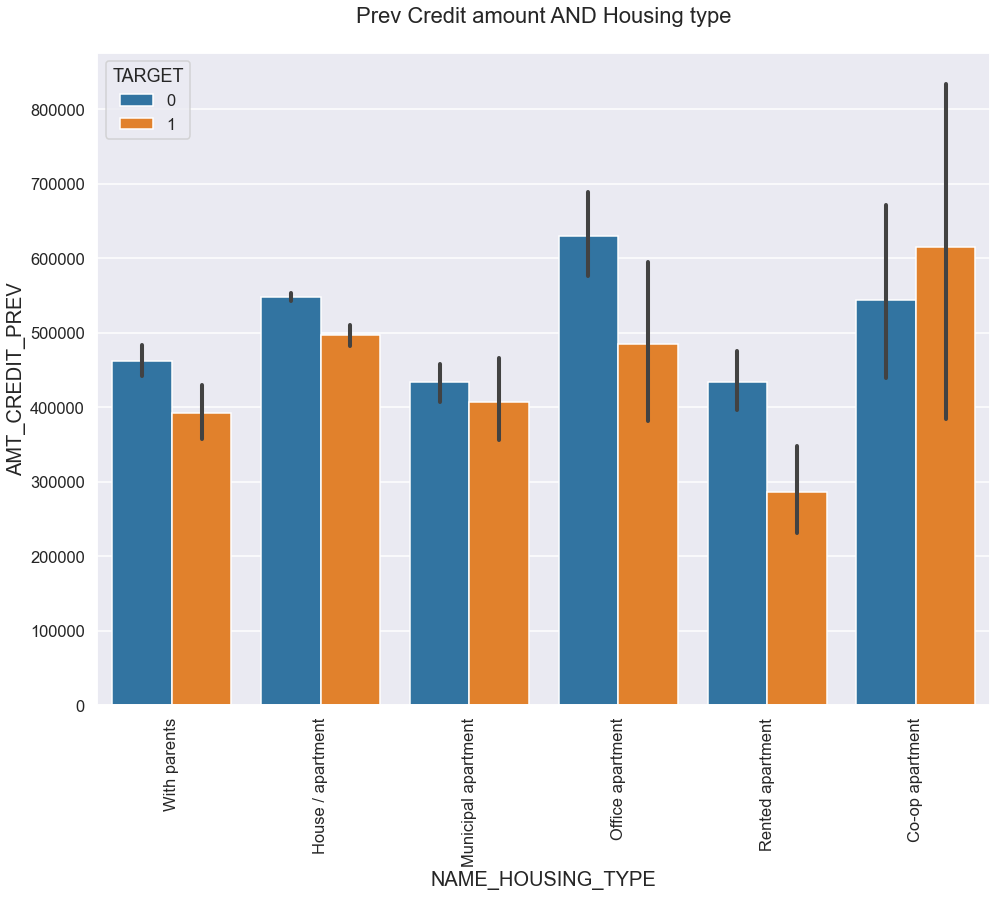

In [298]:
# credit amount prev and Housing type 

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =NewData1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount AND Housing type')
plt.show()

Inference:

1. House and office apartment has higher credit among non-defaulters than defaulters.  
2. Co-op apartment has more defaulters, to whom bank should avoid lending
3. Bank can also continue lending credit to people with parents, rented apartments and muncipal apartments


## Univariate analysis

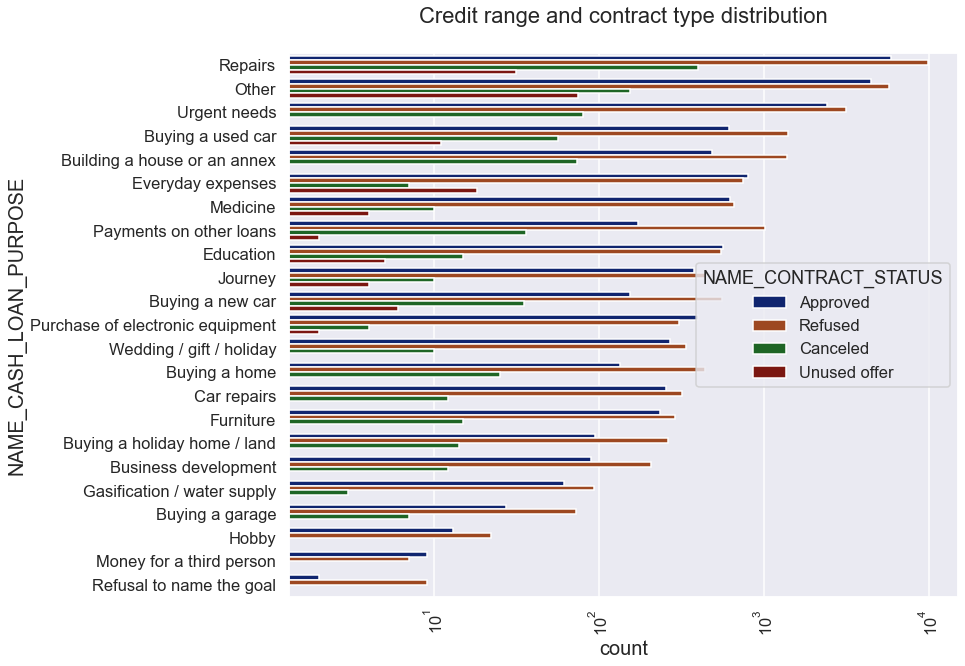

In [343]:
plt.figure(figsize=(12,10))

sns.countplot(data = NewData1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=NewData1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='dark')
sns.set_style('darkgrid')
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Credit range and contract type distribution')
plt.show()

Inference:
1. Repairs has most rejections
2. Buying a new car, building a house and clients payment on other loans has high rejection
3. Education is having rejection and approval of credit significantly


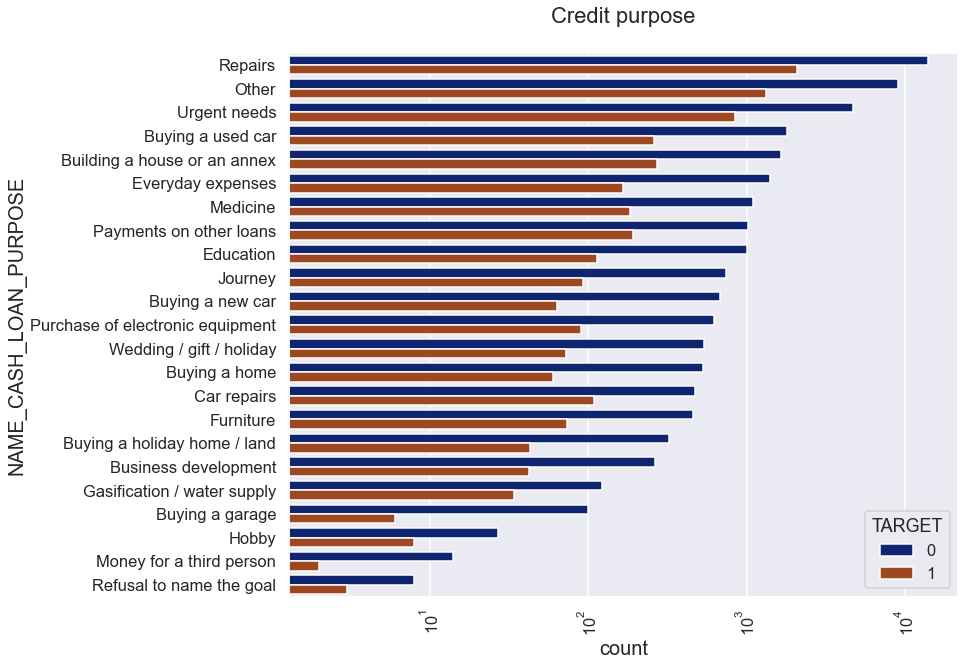

In [342]:
plt.figure(figsize=(12,10))

sns.countplot(data = NewData1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=NewData1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='dark')
sns.set_style('darkgrid')
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Credit purpose')
plt.show()

Inference:
1. Credit given to repairs has high defaulters
2. Other categories who are facing difficult to payback credit amount are those who got credit for buying used car and building new house
  


## Top correlations

In [324]:
# top 10 correlations in previous applications
correlation = PreviousApplication_data.corr() 
corrd = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
corrd = corrd.unstack().reset_index()
corrd.columns = ['Var1', 'Var2', 'Correlation']
corrd.dropna(subset = ['Correlation'], inplace = True)
corrd['Correlation'] = round(corrd['Correlation'], 2)
corrd['Correlation'] = abs(corrd['Correlation'])
corrd.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
26,AMT_CREDIT,AMT_APPLICATION,0.99
51,DAYS_DECISION,AMT_CREDIT,0.22
50,DAYS_DECISION,AMT_APPLICATION,0.21
34,HOUR_APPR_PROCESS_START,AMT_APPLICATION,0.07
35,HOUR_APPR_PROCESS_START,AMT_CREDIT,0.07
52,DAYS_DECISION,HOUR_APPR_PROCESS_START,0.04
60,SELLERPLACE_AREA,HOUR_APPR_PROCESS_START,0.01
48,DAYS_DECISION,SK_ID_PREV,0.01
16,AMT_APPLICATION,SK_ID_PREV,0.01
58,SELLERPLACE_AREA,AMT_APPLICATION,0.01


## Summary of suggestions